In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def filt(wav):
    f=0.9*np.ones_like(wav)
    f[wav<1.0]=0.0
    mask=(wav>=1.0)&(wav<1.2)
    f[mask]=4*wav[mask]-3.9
    return f

In [14]:
dat=np.loadtxt("InGaAs_180K.txt",delimiter=",")

In [15]:
dat[:,1]=dat[:,1]

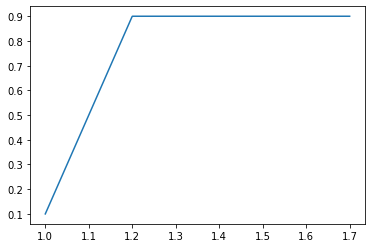

In [16]:
wav=np.linspace(1.0,1.7,1000)
plt.plot(wav,filt(wav))

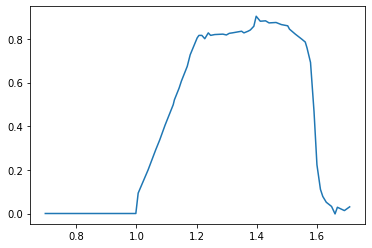

In [17]:
plt.plot(dat[:,0],filt(dat[:,0])*dat[:,1])

In [18]:
w=dat[:,0]
tf=filt(dat[:,0])*dat[:,1]

In [19]:
from scipy import interpolate

In [20]:
finterp = interpolate.interp1d(w, tf, kind='linear')

In [21]:
wav=np.linspace(0.85,1.64,1000)
tfi=finterp(wav)

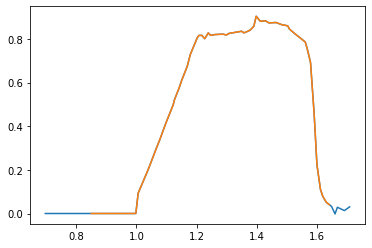

In [23]:
plt.plot(dat[:,0],filt(dat[:,0])*dat[:,1])
plt.plot(wav,tfi)
plt.savefig("trans180K.png")

In [24]:
np.savetxt("trans180K.txt",np.array([wav,tfi]).T)